In [1]:
from bisect import bisect_left, bisect_right
import numpy as np
import scipy
import crossprob

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def plot_loss_cdf(ax, x_1, x_2):
    
    x_1_sorted = np.sort(x_1)
    x_2_sorted = np.sort(x_2)
    
    beta_vals = np.arange(1,x_1.shape[0]+1)/(x_1.shape[0])
    ax.plot(x_1_sorted, beta_vals, label=r'$h_{1}$')
    b_u = np.clip(beta_vals+0.1, 0.0, 1.0)
    b_l = np.clip(beta_vals-0.1, 0.0, 1.0)
    ax.fill_between(x_1_sorted, b_u, b_l, alpha = 0.25)
    ax.plot(x_2_sorted, beta_vals, label=r'$h_{2}$')
    ax.fill_between(x_2_sorted, b_u, b_l, alpha = 0.25)
    
    # ax.set_xticklabels([])
    
    ax.set_xlabel("Loss", fontsize=14)
    ax.set_ylabel(r"$\beta$", fontsize=14)
    ax.set_title("Loss CDF", fontsize=14)
    ax.legend(fontsize=13)
    
    
def plot_lorenz(ax, x_1, x_2):
    
    x_1_sorted = np.sort(x_1)
    x_2_sorted = np.sort(x_2)
    
    x_1_plt = np.cumsum(x_1_sorted)/np.sum(x_1_sorted)
    x_2_plt = np.cumsum(x_2_sorted)/np.sum(x_2_sorted)
    
    beta_vals = np.arange(1,x_1.shape[0]+1)/(x_1.shape[0])
    
    b_width = 0.08
    
    ax.plot(beta_vals, x_1_plt, label=r'$h_{1}$')
    b_u = np.clip(x_1_plt+b_width, 0.0, 1.0)
    b_l = np.clip(x_1_plt-b_width, 0.0, 1.0)
    ax.fill_between(beta_vals, b_u, b_l, alpha=0.25)
    
    ax.plot(beta_vals, x_2_plt, label=r'$h_{2}$')
    b_u = np.clip(x_2_plt+b_width, 0.0, 1.0)
    b_l = np.clip(x_2_plt-b_width, 0.0, 1.0)
    ax.fill_between(beta_vals, b_u, b_l, alpha=0.25)
    ax.plot([0,1], [0,1], "--", label="Line of Equality")
    
    # ax.set_xticklabels([])
    
    ax.set_xlabel(r"$\beta$", fontsize=14)
    ax.set_ylabel("Loss Share", fontsize=14)
    ax.set_title("Lorenz Curves", fontsize=14)
    ax.legend(fontsize=13)
        

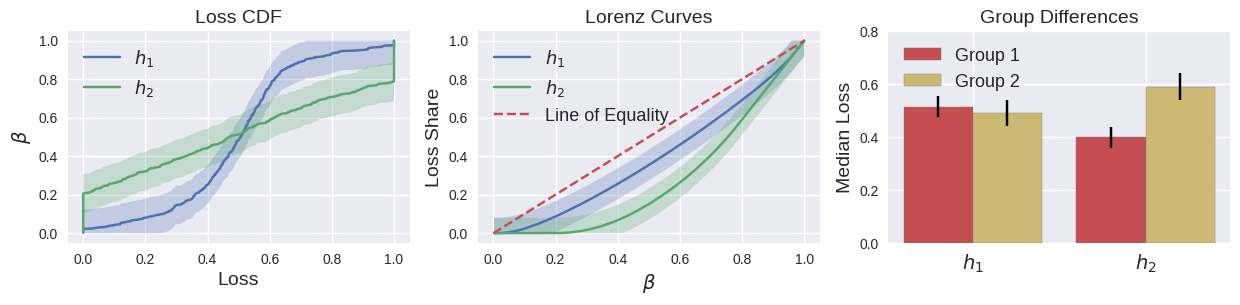

In [3]:
def plot_quantities(ax, x_1, x_2):
    
    x_1_a, x_1_b = x_1
    x_2_a, x_2_b = x_2

    barWidth = 0.4
    # set height of bar
    loss_1 = [np.quantile(x_1_a, 0.5), np.quantile(x_2_a, 0.5)]
    loss_2 = [np.quantile(x_1_b, 0.5), np.quantile(x_2_b, 0.5)]

    # Set position of bar on X axis
    br1 = np.arange(len(loss_1))
    br2 = [x + barWidth for x in br1]

    # Make the plot
    ax.bar(br1, loss_1, width = barWidth, yerr = 0.04,
            edgecolor ='grey', label = r"Group 1", color=plt.rcParams['axes.prop_cycle'].by_key()['color'][2])
    ax.bar(br2, loss_2, width = barWidth, yerr = 0.05,
            edgecolor ='grey', label = r"Group 2", color=plt.rcParams['axes.prop_cycle'].by_key()['color'][4])

    ax.set_xticks([r + barWidth/2 for r in range(len(loss_1))],
            [r'$h_1$', r'$h_2$'], fontsize=14)
    ax.set_ylim(0.0, 0.8)
    ax.set_title("Group Differences", fontsize=14)
    ax.set_ylabel("Median Loss", fontsize=14)
    ax.legend(fontsize=13)
    
from matplotlib import style
plt.style.use('seaborn-v0_8')
plt.rcParams["figure.figsize"] = [15., 2.75]

np.random.seed(1234)

no_samples = 1000
mu_1, mu_2 = 0.5, 0.5
sigma_1_a, sigma_1_b = 0.1, 0.3
sigma_2_a, sigma_2_b = 0.5, 0.8

x_1_a = np.random.normal(mu_1, sigma_1_a, no_samples//4)
x_1_b = np.random.normal(mu_1, sigma_1_b, no_samples//4)
x_2_a = np.random.normal(mu_2-0.15, sigma_2_a, no_samples//4)
x_2_b = np.random.normal(mu_2+0.15, sigma_2_b, no_samples//4)

x_1_a = np.clip(x_1_a, 0.0, 1.0)
x_1_b = np.clip(x_1_b, 0.0, 1.0)
x_2_a = np.clip(x_2_a, 0.0, 1.0)
x_2_b = np.clip(x_2_b, 0.0, 1.0)

x_1 = np.concatenate([x_1_a, x_1_b])
x_2 = np.concatenate([x_2_a, x_2_b])



fig, ax = plt.subplots(1,3)
fig.set_facecolor('white')
plot_loss_cdf(ax[0], x_1, x_2)
plot_lorenz(ax[1], x_1, x_2)
plot_quantities(ax[2], (x_1_a, x_1_b), (x_2_a, x_2_b))
plt.savefig("../plots/synthetic/figure_1.png", bbox_inches="tight", facecolor="white", edgecolor='none')
plt.show()